# Shot Type Differential By Year
## 1: First section will initialize dataframes necessary

In [84]:
#this part all from David's notebook, Early_analysis.ipynb. Thanks, David
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import glob
import os
import re

In [85]:
# fp is a list that will store each year's shot data in order
FG = glob.glob('Shot Data - CSV/Shot Data - *.csv')
YEARs = [re.findall(r'Shot Data - ((\d+)-\d+).csv', s)[0] for s in FG]

YEARs


[('1996-1997', '1996'),
 ('1997-1998', '1997'),
 ('1998-1999', '1998'),
 ('1999-2000', '1999'),
 ('2000-2001', '2000'),
 ('2001-2002', '2001'),
 ('2002-2003', '2002'),
 ('2003-2004', '2003'),
 ('2004-2005', '2004'),
 ('2005-2006', '2005'),
 ('2006-2007', '2006'),
 ('2007-2008', '2007'),
 ('2008-2009', '2008'),
 ('2009-2010', '2009'),
 ('2010-2011', '2010'),
 ('2011-2012', '2011'),
 ('2012-2013', '2012'),
 ('2013-2014', '2013'),
 ('2014-2015', '2014'),
 ('2015-2016', '2015'),
 ('2016-2017', '2016'),
 ('2017-2018', '2017'),
 ('2018-2019', '2018')]

In [86]:
#loop through all years, adding each year's dataframe to the list
# now FG is a list of dataframes, length 23.
# Access each year in sequential order by indices 0 (1996 - 97) to 22 (2018 - 19).
FG = [pd.read_csv(fp, skiprows=1) for fp in FG]  # Skip first row, redundant information

In [87]:
for i in range(len(YEARs)):
    FG[i]['YEAR_SPAN'] = YEARs[i][0]  # Assign '1998-1999'
    FG[i]['YEAR'] = YEARs[i][1]  # Assign '1998'
    FG[i]['YEAR'] = FG[i]['YEAR'].astype(int)

In [88]:
df = pd.concat(FG, ignore_index=True)
# df = pd.concat(FG)

In [89]:
def replace_team_name(name):
    if name == 'Seattle SuperSonics':
        return 'Oklahoma City Thunder'
    elif name == 'Charlotte Bobcats':
        return 'Charlotte Hornets'
    elif name == 'Vancouver Grizzlies':
        return 'Memphis Grizzlies'
    elif name == 'New Orleans Hornets':
        return 'New Orleans Pelicans'
    elif name == 'Washington Bullets':
        return 'Washington Wizards'
    elif name == 'Los Angeles Clippers':
        return 'LA Clippers'
    elif name == 'New Jersey Nets':
        return 'Brooklyn Nets'
    return name

In [90]:
df['TEAM'] = df['TEAM'].apply(replace_team_name)

In [91]:
#get just the Hawks data for every year
df_hawks = df[df['TEAM'] == 'Atlanta Hawks']
df_hawks = df_hawks.set_index(np.arange(df_hawks.shape[0]))
df_hawks

,TEAM,FGM-C,FGA-C,FG%-C,FGM-M,FGA-M,FG%-M,FGM-L,FGA-L,FG%-L,FGM-T,FGA-T,FG%-T,YEAR_SPAN,YEAR
0,Atlanta Hawks,1372,2583,53.1,399,1044,38.2,646,1582,40.8,395,1084,36.4,1996-1997,1996
1,Atlanta Hawks,1530,2803,54.6,533,1424,37.4,490,1114,44.0,332,998,33.3,1997-1998,1997
2,Atlanta Hawks,771,1512,51.0,286,831,34.4,286,774,37.0,196,628,31.2,1998-1999,1998
3,Atlanta Hawks,1390,2528,55.0,748,2002,37.4,605,1467,41.2,256,793,32.3,1999-2000,1999
4,Atlanta Hawks,1335,2638,50.6,676,1777,38.0,532,1317,40.4,332,920,36.1,2000-2001,2000
5,Atlanta Hawks,1537,2935,52.4,432,1213,35.6,510,1272,40.1,422,1181,35.7,2001-2002,2001
6,Atlanta Hawks,1296,2469,52.5,595,1445,41.2,567,1381,41.1,401,1123,35.7,2002-2003,2002
7,Atlanta Hawks,1403,2701,51.9,460,1241,37.1,547,1338,40.9,419,1245,33.7,2003-2004,2003
8,Atlanta Hawks,1704,3236,52.7,356,1104,32.2,578,1359,42.5,303,950,31.9,2004-2005,2004
9,Atlanta Hawks,1565,2933,53.4,336,912,36.8,620,1496,41.4,425,1139,37.3,2005-2006,2005


$ \text{Now create a list of percent shot change } \Delta S = \{\Delta S_{0}, \Delta S_{1}, ..., \Delta S_{i}, ..., \Delta S_{n}\} \text{ by year for all n years.}\\
\Delta S_{i} = \frac{S_{i} - S_{i-1}}{S_{i-1}} \\ \text{i.e. } \Delta S \text{ will span years 1997-2018.}$

In [92]:
#First for attempted field goals FGA-T
delS_A = []
for year in range(1,23):
    del_Si = (df_hawks.loc[year]['FGA-T'] - df_hawks.loc[year-1]['FGA-T'])/(df_hawks.loc[year-1]['FGA-T'])
    delS_A.append(del_Si)
#insert dummy 0 at start of list to represent the fact that year 1996 is our baseline
delS_A.insert(0,0)
df_hawks['dFGA-T'] = delS_A

Now, plot the new differential data across years

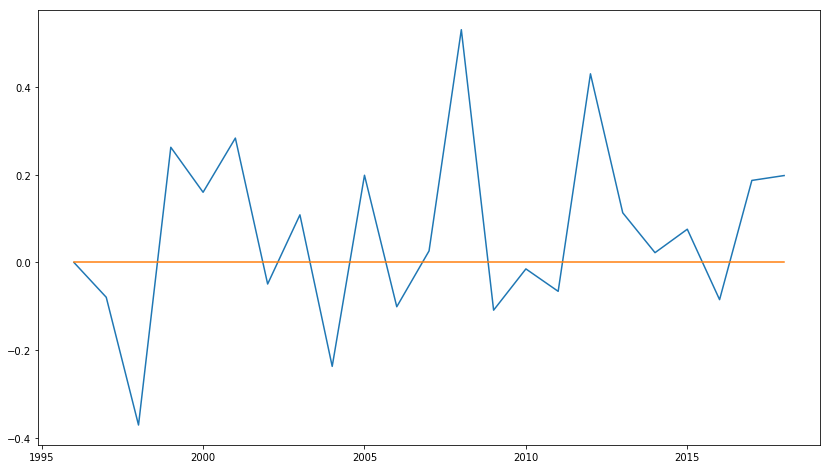

In [103]:
plt.figure(figsize=(14,8))
plt.plot(df_hawks['YEAR'], df_hawks['dFGA-T'])
plt.plot(df_hawks['YEAR'], [0]*23)
#plt.figure(figsize=(20,20))
plt.show()